## **Welcome to my movie recommendation system. The goal is to recommend movies based on user preferences and similarity between movies.**

In [38]:
import pandas as pd

In [39]:
movies=pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
movies.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [40]:
import matplotlib.pyplot as plt

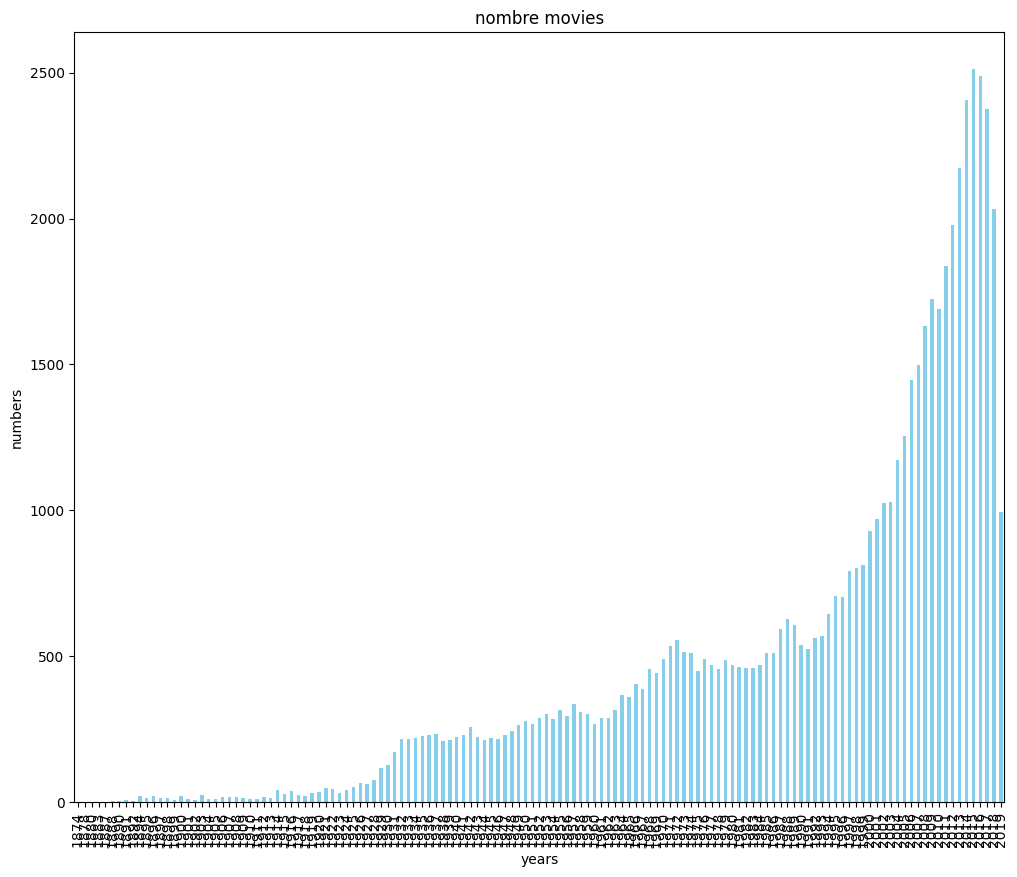

In [41]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')

plt.figure(figsize=(12,10))

movies['year'].value_counts().sort_index().plot(kind='bar',color='skyblue')
plt.title('nombre movies')
plt.xlabel('years')
plt.ylabel('numbers')
plt.show()

In [42]:
import re

In [43]:
def clean_title(title):
    title = re.sub("[^a-zA-Z0-9 ]" ,"" ,title)
    return title

movies['clean_title']=movies['title'].apply(clean_title)
movies.head()

,movieId,title,genres,year,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II 1995


In [44]:
import matplotlib.pyplot as plt

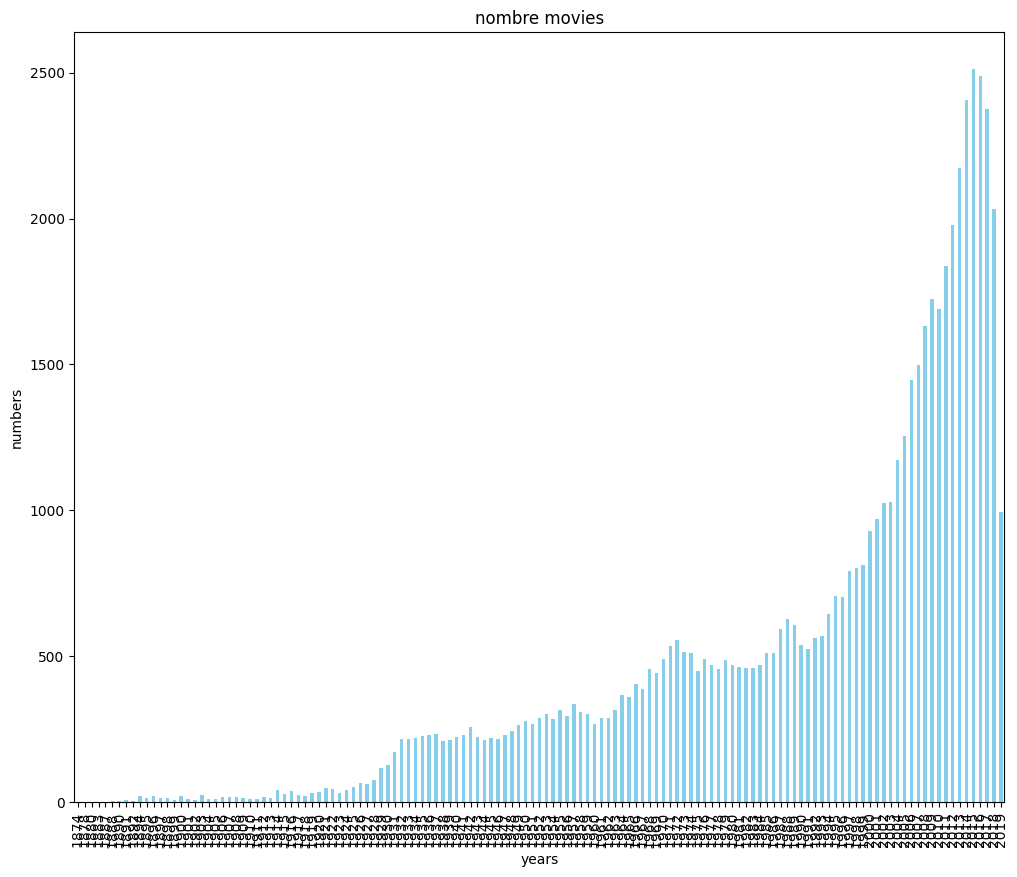

In [45]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
plt.figure(figsize=(12,10))

movies['year'].value_counts().sort_index().plot(kind='bar',color='skyblue')
plt.title('nombre movies')
plt.xlabel('years')
plt.ylabel('numbers')
plt.show()

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))

tfidf = vectorizer.fit_transform(movies["clean_title"])

In [48]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

In [49]:
movie_input = widgets.Text(
    value='Toy Story',  # Default value when the widget is first displayed
    description='Movie Title:',  # Label for the input box
    disabled=False  # Whether the input box is editable (False means it's editable)
)

def search(title):
    title = clean_title(title)
    query_vec = vectorizer.transform([title])

    similarity = cosine_similarity(query_vec, tfidf).flatten()

    indices = np.argpartition(similarity, -5)[-5:]
    results = movies.iloc[indices].iloc[::-1]
    return results
movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            display(search(title))

movie_input.observe(on_type, names='value')

display(movie_input, movie_list)

Text(value='Toy Story', description='Movie Title:')

Output()

In [50]:
def find_similar_movies(movie_id):
    similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()
    similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)
    similar_user_recs = similar_user_recs[similar_user_recs > 0.10]

    all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]
    all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())

    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("score", ascending=False)

    return rec_percentages.head(10).merge(movies, left_index=True, right_on="movieId")[["score", "title", "genres"]]

In [51]:
movie_name_input = widgets.Text(
    value='Toy Story',
    description='Movie Title:',
    disabled=False
)
recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            results = search(title)
            movie_id = results.iloc[0]["movieId"]
            display(find_similar_movies(movie_id))

movie_name_input.observe(on_type, names='value')

display(movie_name_input, recommendation_list)

Text(value='Toy Story', description='Movie Title:')

Output()